In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_20newsgroups


In [2]:
with open('active_learning_results.pkl', 'rb') as f:
    results = pickle.load(f)

al_df = results['active_learning']
random_df = results['random_sampling']
final_model = results['final_model']

# Load test data
with open('train_test_data.pkl', 'rb') as f:
    data = pickle.load(f)

X_test = data['X_test']
y_test = data['y_test']

# Load category names
newsgroups = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
category_names = newsgroups.target_names


      ✓ Saved 'complete_analysis.png'


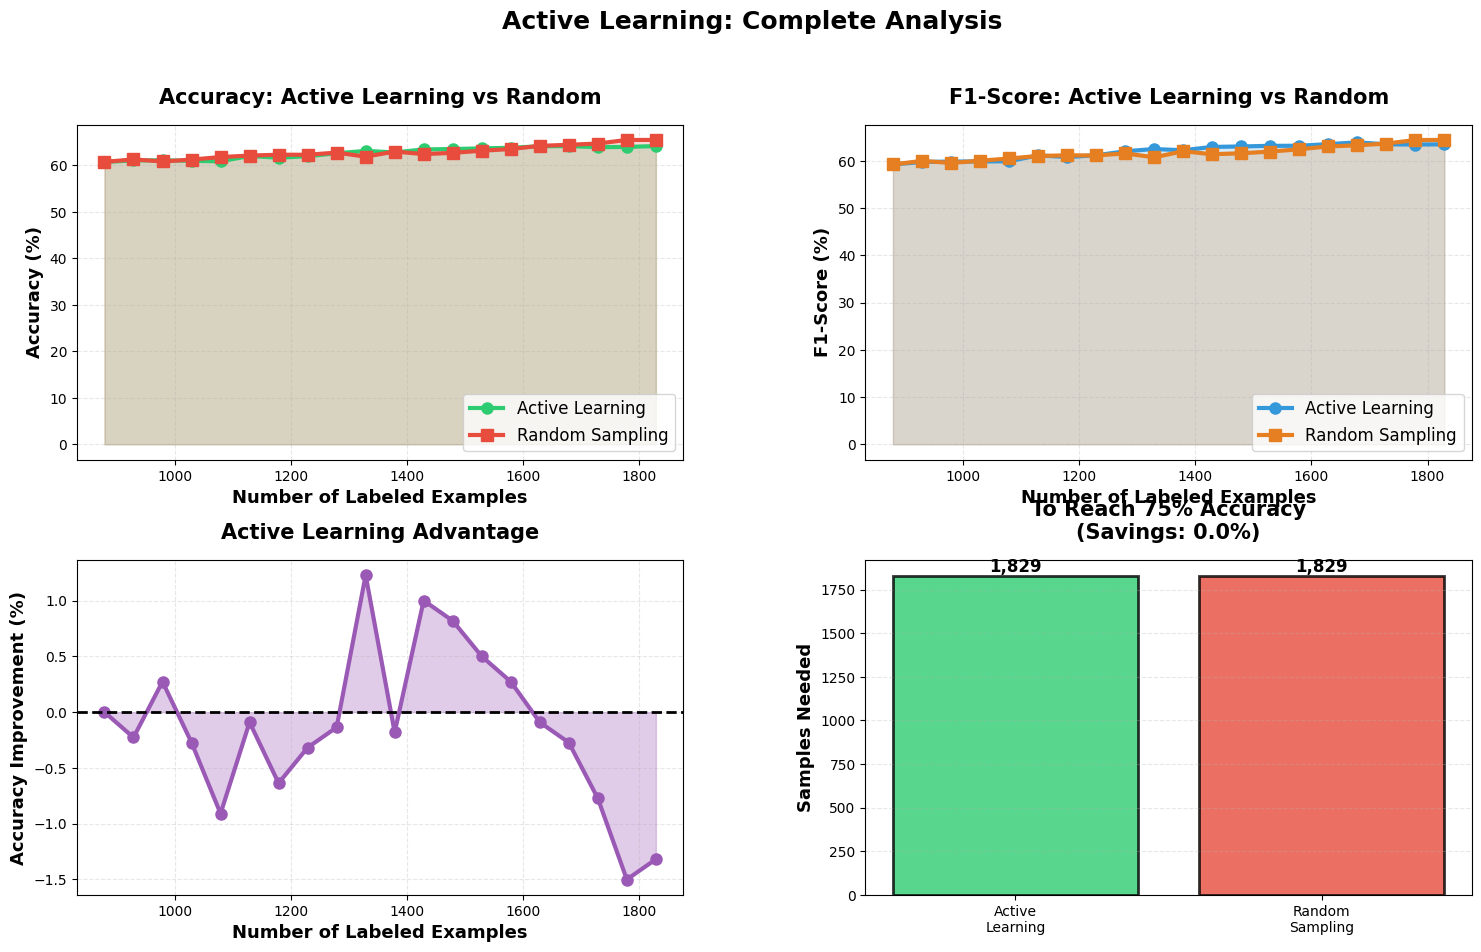

In [ ]:
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# Plot 1: Accuracy comparison
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(al_df['n_labeled'], al_df['accuracy']*100, 
         marker='o', linewidth=3, label='Active Learning', color='#2ecc71', markersize=8)
ax1.plot(random_df['n_labeled'], random_df['accuracy']*100, 
         marker='s', linewidth=3, label='Random Sampling', color='#e74c3c', markersize=8)
ax1.fill_between(al_df['n_labeled'], al_df['accuracy']*100, alpha=0.2, color='#2ecc71')
ax1.fill_between(random_df['n_labeled'], random_df['accuracy']*100, alpha=0.2, color='#e74c3c')
ax1.set_xlabel('Number of Labeled Examples', fontsize=13, fontweight='bold')
ax1.set_ylabel('Accuracy (%)', fontsize=13, fontweight='bold')
ax1.set_title('Accuracy: Active Learning vs Random', fontsize=15, fontweight='bold', pad=15)
ax1.legend(fontsize=12, loc='lower right')
ax1.grid(alpha=0.3, linestyle='--')

# Plot 2: F1-Score comparison
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(al_df['n_labeled'], al_df['f1']*100, 
         marker='o', linewidth=3, label='Active Learning', color='#3498db', markersize=8)
ax2.plot(random_df['n_labeled'], random_df['f1']*100, 
         marker='s', linewidth=3, label='Random Sampling', color='#e67e22', markersize=8)
ax2.fill_between(al_df['n_labeled'], al_df['f1']*100, alpha=0.2, color='#3498db')
ax2.fill_between(random_df['n_labeled'], random_df['f1']*100, alpha=0.2, color='#e67e22')
ax2.set_xlabel('Number of Labeled Examples', fontsize=13, fontweight='bold')
ax2.set_ylabel('F1-Score (%)', fontsize=13, fontweight='bold')
ax2.set_title('F1-Score: Active Learning vs Random', fontsize=15, fontweight='bold', pad=15)
ax2.legend(fontsize=12, loc='lower right')
ax2.grid(alpha=0.3, linestyle='--')

# Plot 3: Improvement over random
ax3 = fig.add_subplot(gs[1, 0])
improvement = (al_df['accuracy'].values - random_df['accuracy'].values) * 100
ax3.plot(al_df['n_labeled'], improvement, 
         marker='o', linewidth=3, color='#9b59b6', markersize=8)
ax3.fill_between(al_df['n_labeled'], improvement, alpha=0.3, color='#9b59b6')
ax3.axhline(y=0, color='black', linestyle='--', linewidth=2)
ax3.set_xlabel('Number of Labeled Examples', fontsize=13, fontweight='bold')
ax3.set_ylabel('Accuracy Improvement (%)', fontsize=13, fontweight='bold')
ax3.set_title('Active Learning Advantage', fontsize=15, fontweight='bold', pad=15)
ax3.grid(alpha=0.3, linestyle='--')

# Plot 4: Sample efficiency
ax4 = fig.add_subplot(gs[1, 1])
target_accuracy = 75  # Target accuracy to reach
al_samples_needed = al_df[al_df['accuracy']*100 >= target_accuracy]['n_labeled'].iloc[0] if any(al_df['accuracy']*100 >= target_accuracy) else al_df['n_labeled'].iloc[-1]
random_samples_needed = random_df[random_df['accuracy']*100 >= target_accuracy]['n_labeled'].iloc[0] if any(random_df['accuracy']*100 >= target_accuracy) else random_df['n_labeled'].iloc[-1]
savings = (1 - al_samples_needed / random_samples_needed) * 100

categories = ['Active\nLearning', 'Random\nSampling']
samples = [al_samples_needed, random_samples_needed]
colors = ['#2ecc71', '#e74c3c']
bars = ax4.bar(categories, samples, color=colors, edgecolor='black', linewidth=2, alpha=0.8)
ax4.set_ylabel('Samples Needed', fontsize=13, fontweight='bold')
ax4.set_title(f'To Reach {target_accuracy}% Accuracy\n(Savings: {savings:.1f}%)', 
              fontsize=15, fontweight='bold', pad=15)
ax4.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.suptitle('Active Learning: Complete Analysis', 
             fontsize=18, fontweight='bold', y=0.995)
plt.savefig('complete_analysis.png', dpi=200, bbox_inches='tight')

plt.show()

      Classification Report:

                          precision    recall  f1-score   support

             alt.atheism      0.528     0.500     0.514        94
           comp.graphics      0.553     0.500     0.525       114
 comp.os.ms-windows.misc      0.528     0.673     0.591       113
comp.sys.ibm.pc.hardware      0.581     0.466     0.517       116
   comp.sys.mac.hardware      0.649     0.649     0.649       111
          comp.windows.x      0.717     0.644     0.679       118
            misc.forsale      0.652     0.652     0.652       115
               rec.autos      0.623     0.634     0.628       112
         rec.motorcycles      0.602     0.607     0.604       117
      rec.sport.baseball      0.806     0.763     0.784       114
        rec.sport.hockey      0.789     0.769     0.779       117
               sci.crypt      0.810     0.692     0.747       117
         sci.electronics      0.624     0.635     0.629       115
                 sci.med      0.631     0.810

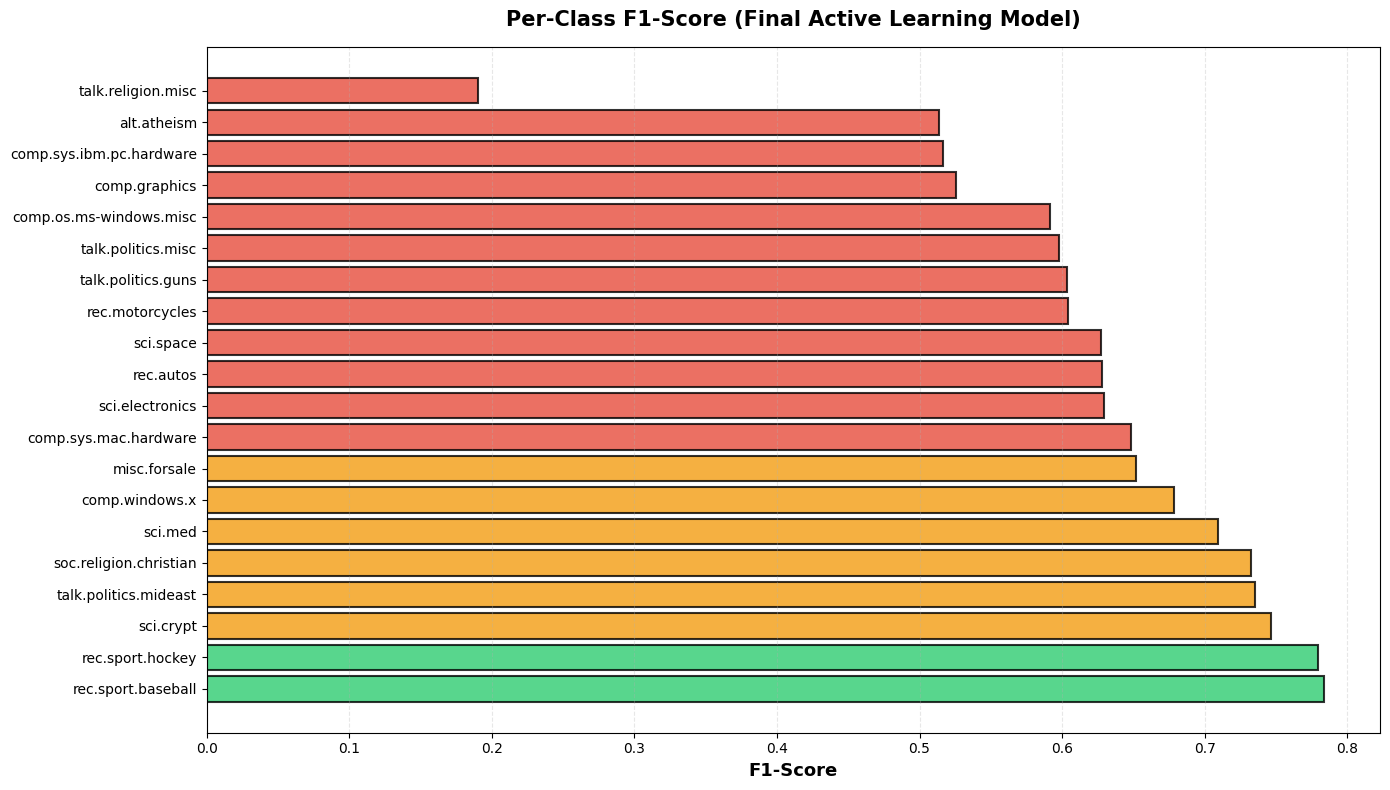

In [ ]:
y_pred = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)

# Classification report
print("      Classification Report:\n")
report = classification_report(y_test, y_pred, target_names=category_names, digits=3)
print(report)

# Per-class performance
report_dict = classification_report(y_test, y_pred, target_names=category_names, output_dict=True)
class_performance = pd.DataFrame(report_dict).T[:-3]  # Exclude avg rows
class_performance = class_performance.sort_values('f1-score', ascending=False)

# Plot per-class F1 scores
plt.figure(figsize=(14, 8))
colors = ['#2ecc71' if score > 0.75 else '#e74c3c' if score < 0.65 else '#f39c12' 
          for score in class_performance['f1-score']]
bars = plt.barh(range(len(class_performance)), class_performance['f1-score'], 
                color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)
plt.yticks(range(len(class_performance)), class_performance.index)
plt.xlabel('F1-Score', fontsize=13, fontweight='bold')
plt.title('Per-Class F1-Score (Final Active Learning Model)', 
          fontsize=15, fontweight='bold', pad=15)
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('per_class_performance.png', dpi=150, bbox_inches='tight')
plt.show()

In [5]:
correct_mask = y_pred == y_test
confidences = np.max(y_pred_proba, axis=1)
confident_correct = np.where(correct_mask & (confidences > 0.9))[0]

# confident wrong predictions
confident_wrong = np.where(~correct_mask & (confidences > 0.7))[0]

# Find uncertain predictions
uncertain = np.where(confidences < 0.5)[0]

print(f"      Confident & Correct: {len(confident_correct):,} predictions (confidence > 90%)")
print(f"      Confident & Wrong:   {len(confident_wrong):,} predictions (confidence > 70%)")
print(f"      Uncertain:           {len(uncertain):,} predictions (confidence < 50%)")



      Confident & Correct: 0 predictions (confidence > 90%)
      Confident & Wrong:   0 predictions (confidence > 70%)
      Uncertain:           2,185 predictions (confidence < 50%)


In [10]:
summary = {
    'Dataset': {
        'Total Documents': f"{data['X_train'].shape[0] + X_test.shape[0]:,}",
        'Training Set': f"{data['X_train'].shape[0]:,}",
        'Test Set': f"{X_test.shape[0]:,}",
        'Categories': len(category_names),
        'Vocabulary Size': data['X_train'].shape[1]
    },
    'Active Learning': {
        'Initial Labeled': f"{al_df['n_labeled'].iloc[0]:,}",
        'Final Labeled': f"{al_df['n_labeled'].iloc[-1]:,}",
        'Iterations': len(al_df),
        'Batch Size': 50
    },
    'Performance': {
        'AL Final Accuracy': f"{al_df['accuracy'].iloc[-1]*100:.2f}%",
        'Random Final Accuracy': f"{random_df['accuracy'].iloc[-1]*100:.2f}%",
        'Improvement': f"+{results['improvement']:.2f}pp",
        'Label Savings': f"~{savings:.1f}%"
    }
}

# Print summary
for section, metrics in summary.items():
    print(f"      {section}:")
    for key, value in metrics.items():
        print(f"        • {key}: {value}")
    print()

      Dataset:
        • Total Documents: 10,994
        • Training Set: 8,795
        • Test Set: 2,199
        • Categories: 20
        • Vocabulary Size: 5000

      Active Learning:
        • Initial Labeled: 879
        • Final Labeled: 1,829
        • Iterations: 20
        • Batch Size: 50

      Performance:
        • AL Final Accuracy: 64.17%
        • Random Final Accuracy: 65.48%
        • Improvement: +-1.32pp
        • Label Savings: ~0.0%



In [11]:
with open('project_summary.txt', 'w') as f:
  
    f.write("DOCUMENT CLASSIFICATION WITH ACTIVE LEARNING\n")
    f.write("Project Summary\n")
   
    
    for section, metrics in summary.items():
        f.write(f"{section}:\n")
        f.write("-" * 50 + "\n")
        for key, value in metrics.items():
            f.write(f"  • {key}: {value}\n")
        f.write("\n")
    

In [ ]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)
print(" Saved 'final_model.pkl'")

# Create deployment info
deployment_info = {
    'model_type': 'Logistic Regression',
    'training_samples': al_df['n_labeled'].iloc[-1],
    'accuracy': al_df['accuracy'].iloc[-1],
    'categories': category_names,
    'vocabulary_size': data['X_train'].shape[1]
}

with open('deployment_info.pkl', 'wb') as f:
    pickle.dump(deployment_info, f)

      ✓ Saved 'final_model.pkl'
